In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [5]:
df = pd.read_excel('Trucks_Data.xlsx')

In [6]:
df.columns

Index(['clientID', 'clientsubID', 'Numéro d'immatriculation du camion ',
       'Date d'achat ', 'Camion encore en exploitation ',
       'Si camion hors exploitation, date de fin d'utlisation\n du camion ',
       'Kilométrage à la date\n de fin d'exploitation  ou au 1er janvier 2018',
       'Type du véhicule (porteur/tracteur)',
       'Camion neuf ou d'occasion au moment de l'acquisition ', 'Marque ',
       'Modèle ', 'Tonnage (PTAC) \n(en tonnes)',
       'Nombre d'essieux (nombre entier)',
       'Nombre de roues x nombre de roues motrices',
       'Puissance du moteur \n(chevaux DIN) ',
       'Norme d'émissions \nEuro \n(EURO 1 à 6) ',
       'Mode d'acquisition du camion : \n(1) achat\n(2) leasing / crédit-bail \n(3) locatio',
       'Acquisition effectuée dans le cadre \nd'une acquisition groupée \n(plusieurs véhic',
       'Si acquisition groupée, taille de l'acquisition groupée \nen nombre de véhicules ',
       'Prix d'achat du camion complet (euros HT)',
       'Prix d'a

In [7]:
df_VOLVO = df[df['Marque '] == 'VOLVO']

df_VOLVO = df_VOLVO.rename(columns={'Nombre de roues x nombre de roues motrices' : 'nb_roues_x_nb_roues_motrice'})
df_VOLVO.columns

L_marque = []
for marque in df['Marque '].unique():
    locals()["df_" + f"{marque}"]= df[df['Marque '] == marque]
    L_marque.append(marque)
print(L_marque)
df_RENAULT

['VOLVO', 'RENAULT', 'MAN', 'AUTRE', 'DAF', 'DAIMLER', 'SCANIA', 'IVECO']


,clientID,clientsubID,Numéro d'immatriculation du camion,Date d'achat,Camion encore en exploitation,"Si camion hors exploitation, date de fin d'utlisation\n du camion",Kilométrage à la date\n de fin d'exploitation ou au 1er janvier 2018,Type du véhicule (porteur/tracteur),Camion neuf ou d'occasion au moment de l'acquisition,Marque,...,IVECO,MAN,RENAULT,SCANIA,VOLVO,acquisition,grp,PTAC,Puissance,roues_m
55,2,1,1230QZ41,1998-02-07,HORS EXPLOITATION,2008-12-10 00:00:00,768085.0,TRACTEUR,NEUF,RENAULT,...,0,0,1,0,0,2.0,1,19.0,385.000000,2.0
57,2,1,4807 RD 41,2000-07-31,HORS EXPLOITATION,2008-01-18 00:00:00,965394.0,TRACTEUR,NEUF,RENAULT,...,0,0,1,0,0,3.0,1,19.0,340.000000,2.0
62,2,1,6636SQ41/DC271HV,2008-11-17,EN EXPLOITATION,NaN,NaN,TRACTEUR,NEUF,RENAULT,...,0,0,1,0,0,2.0,1,19.0,451.393829,2.0
64,2,1,CF996LB,2012-05-23,EN EXPLOITATION,NaN,NaN,TRACTEUR,NEUF,RENAULT,...,0,0,1,0,0,2.0,1,19.0,530.251770,2.0
66,2,1,DH064VM,2014-07-22,EN EXPLOITATION,NaN,NaN,TRACTEUR,NEUF,RENAULT,...,0,0,1,0,0,2.0,1,19.0,489.463196,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6415,40,1,6052 VN 88,2008-02-12,HORS EXPLOITATION,NaN,NaN,TRACTEUR,NEUF,RENAULT,...,0,0,1,0,0,2.0,1,19.0,NaN,2.0
6416,40,1,6053 VN 88,2008-02-12,HORS EXPLOITATION,NaN,NaN,TRACTEUR,NEUF,RENAULT,...,0,0,1,0,0,2.0,1,19.0,NaN,2.0
6417,40,1,6054 VN 88,2008-02-12,HORS EXPLOITATION,NaN,NaN,TRACTEUR,NEUF,RENAULT,...,0,0,1,0,0,2.0,1,19.0,NaN,2.0
6418,40,1,6055 VN 88,2008-02-12,HORS EXPLOITATION,NaN,NaN,TRACTEUR,NEUF,RENAULT,...,0,0,1,0,0,2.0,1,19.0,NaN,2.0


In [8]:
#Plot l'évolution des prix des camions de même type pour les différentes companies
new_df = pd.read_excel("Trucks_Data.xlsx", parse_dates=["date"]) 

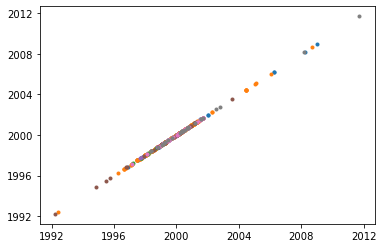

In [9]:
for marque in L_marque:
    plt.plot(locals()["df_" + f"{marque}"][locals()["df_" + f"{marque}"]["Norme d'émissions \nEuro \n(EURO 1 à 6) "] == 'EURO 2']["Date d'achat "], locals()["df_" + f"{marque}"][locals()["df_" + f"{marque}"]["Norme d'émissions \nEuro \n(EURO 1 à 6) "] == 'EURO 2']["Date d'achat "], '.')
    plt.show

In [10]:
for marque in L_marque:
    A = locals()["df_" + f"{marque}"][locals()["df_" + f"{marque}"]["Norme d'émissions \nEuro \n(EURO 1 à 6) "] == 'EURO 2']["Date d'achat "]
    print (f'{marque}')
    print(A.describe(datetime_is_numeric=True))
    print('\n')
    #print(f'min = {np.min(A)}, max = {np.max(A)}, mean = {np.mean(A)} )


VOLVO
count                               63
mean     2000-01-31 07:37:08.571428608
min                1996-11-19 00:00:00
25%                1998-10-20 00:00:00
50%                1999-12-31 00:00:00
75%                2000-07-09 00:00:00
max                2009-01-05 00:00:00
Name: Date d'achat , dtype: object


RENAULT
count                    200
mean     1999-11-14 17:02:24
min      1992-06-04 00:00:00
25%      1999-01-02 06:00:00
50%      2000-01-07 12:00:00
75%      2000-10-30 00:00:00
max      2008-09-08 00:00:00
Name: Date d'achat , dtype: object


MAN
count                     12
mean     1998-08-07 04:00:00
min      1997-03-11 00:00:00
25%      1997-09-29 00:00:00
50%      1998-06-16 12:00:00
75%      1999-02-08 00:00:00
max      2000-05-16 00:00:00
Name: Date d'achat , dtype: object


AUTRE
count                      3
mean     1999-05-06 00:00:00
min      1998-10-26 00:00:00
25%      1998-11-06 00:00:00
50%      1998-11-17 00:00:00
75%      1999-08-10 00:00:00
max      200

/opt/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


ConversionError: Failed to convert value(s) to axis units: array([Series([], Name: Date d'achat , dtype: datetime64[ns]),
       Series([], Name: Date d'achat , dtype: datetime64[ns]),
       3551   1994-07-21
       Name: Date d'achat , dtype: datetime64[ns],
       3553   1995-01-11
       3554   1995-05-09
       Name: Date d'achat , dtype: datetime64[ns],
       3555   1996-02-05
       3556   1996-02-07
       3557   1996-08-30
       3558   1996-11-19
       4048   1996-04-03
       Name: Date d'achat , dtype: datetime64[ns],
       0      1997-01-25
       1      1997-12-31
       124    1997-12-01
       212    1997-12-01
       214    1997-12-01
       215    1997-12-01
       232    1997-12-01
       3559   1997-02-21
       3560   1997-07-01
       3561   1997-07-15
       3562   1997-10-02
       6420   1997-09-30
       6421   1997-09-30
       6422   1997-09-30
       6423   1997-09-30
       6424   1997-09-30
       6425   1997-10-31
       6426   1997-10-31
       6427   1997-10-31
       6428   1997-11-27
       6429   1997-11-27
       Name: Date d'achat , dtype: datetime64[ns],
       213    1998-10-20
       216    1998-11-09
       217    1998-10-20
       218    1998-10-20
       223    1998-06-17
       224    1998-09-22
       225    1998-11-10
       229    1998-01-15
       3322   1998-10-01
       3460   1998-01-02
       3461   1998-01-02
       3462   1998-06-12
       3563   1998-06-15
       3565   1998-12-29
       5521   1998-12-08
       6430   1998-09-24
       6431   1998-09-24
       6432   1998-09-30
       6433   1998-09-30
       6434   1998-09-30
       6435   1998-09-30
       6436   1998-09-30
       6437   1998-09-21
       6438   1998-09-21
       6439   1998-09-24
       6440   1998-09-24
       6441   1998-10-23
       6442   1998-10-13
       6443   1998-11-02
       6444   1998-11-17
       6445   1998-11-17
       6446   1998-12-14
       6447   1998-12-14
       6448   1998-12-14
       Name: Date d'achat , dtype: datetime64[ns],
       2      1999-02-04
       3      1999-02-18
       56     1999-03-31
       125    1999-10-15
       193    1999-08-30
       209    1999-04-07
       226    1999-04-07
       3389   1999-10-18
       3393   1999-06-21
       5522   1999-07-05
       5523   1999-07-27
       5525   1999-10-08
       5526   1999-12-29
       5527   1999-12-31
       5528   1999-12-31
       6449   1999-09-29
       6450   1999-09-29
       6451   1999-09-29
       6452   1999-09-24
       6453   1999-09-24
       6454   1999-09-24
       6455   1999-09-30
       6456   1999-09-24
       6457   1999-09-24
       6458   1999-09-24
       6459   1999-09-21
       6460   1999-09-21
       6461   1999-09-21
       6462   1999-09-21
       6468   1999-09-30
       6469   1999-09-30
       6470   1999-09-30
       6471   1999-10-16
       6472   1999-10-16
       6473   1999-10-16
       6474   1999-09-30
       6475   1999-09-30
       6476   1999-09-30
       Name: Date d'achat , dtype: datetime64[ns],
       117    2000-06-26
       118    2000-06-26
       126    2000-02-23
       127    2000-02-29
       128    2000-02-29
       129    2000-02-29
       134    2000-03-21
       170    2000-01-05
       177    2000-05-23
       227    2000-11-20
       230    2000-02-29
       231    2000-02-29
       2874   2000-02-17
       2875   2000-08-31
       2877   2000-11-29
       3086   2000-01-07
       3087   2000-01-07
       3088   2000-01-07
       3089   2000-01-07
       3090   2000-01-07
       3091   2000-03-07
       3313   2000-07-20
       5301   2000-03-28
       5302   2000-05-12
       5529   2000-01-06
       5542   2000-04-25
       5546   2000-06-25
       5551   2000-09-05
       5553   2000-10-19
       5554   2000-10-19
       6463   2000-03-03
       6464   2000-03-03
       6465   2000-03-03
       6466   2000-03-13
       6467   2000-03-13
       6477   2000-09-08
       6478   2000-09-08
       6479   2000-08-04
       6480   2000-08-04
       6481   2000-08-04
       6482   2000-08-04
       6483   2000-08-04
       6484   2000-08-04
       6485   2000-07-31
       6486   2000-07-31
       6487   2000-08-04
       6488   2000-08-04
       6489   2000-10-27
       6490   2000-10-18
       6491   2000-09-26
       6492   2000-09-26
       6493   2000-09-26
       6494   2000-09-26
       6495   2000-10-03
       6496   2000-10-03
       6497   2000-09-13
       6498   2000-09-13
       6499   2000-09-20
       6505   2000-09-26
       6506   2000-09-26
       Name: Date d'achat , dtype: datetime64[ns],
       4      2001-03-14
       5      2001-03-14
       6      2001-03-14
       7      2001-07-16
       138    2001-01-15
       139    2001-01-15
       140    2001-01-06
       141    2001-01-15
       142    2001-01-23
       143    2001-01-23
       144    2001-01-23
       155    2001-01-17
       2879   2001-07-12
       2880   2001-07-12
       3093   2001-01-02
       3376   2001-10-31
       3379   2001-11-15
       3380   2001-11-15
       5565   2001-07-05
       5566   2001-07-05
       5567   2001-07-05
       5568   2001-07-05
       5569   2001-07-05
       5570   2001-07-25
       5571   2001-08-05
       5572   2001-08-05
       5573   2001-08-05
       5574   2001-08-05
       5575   2001-08-05
       5577   2001-10-15
       5578   2001-10-15
       6500   2001-03-09
       6501   2001-02-26
       6502   2001-02-14
       6503   2001-02-14
       6504   2001-03-09
       6507   2001-12-20
       6509   2001-12-20
       6513   2001-12-20
       6514   2001-12-20
       Name: Date d'achat , dtype: datetime64[ns],
       8      2002-01-01
       9      2002-01-02
       10     2002-11-08
       208    2002-11-12
       2885   2002-06-14
       2886   2002-09-12
       3097   2002-08-05
       3332   2002-10-14
       3334   2002-10-15
       3381   2002-07-24
       4244   2002-11-29
       5600   2002-12-11
       6508   2002-01-04
       6510   2002-01-16
       6511   2002-01-04
       6512   2002-01-16
       6515   2002-01-23
       6516   2002-02-05
       Name: Date d'achat , dtype: datetime64[ns],
       11     2003-01-09
       12     2003-03-03
       13     2003-06-20
       14     2003-06-20
       15     2003-09-11
       58     2003-10-24
       135    2003-02-24
       136    2003-02-24
       137    2003-02-26
       195    2003-04-11
       211    2003-05-19
       2887   2003-02-12
       2888   2003-02-12
       3098   2003-01-03
       3099   2003-01-03
       3100   2003-01-06
       3444   2003-03-03
       3448   2003-11-20
       4242   2003-06-02
       4288   2003-11-21
       4289   2003-06-18
       5047   2003-10-15
       5601   2003-01-23
       5906   2003-03-01
       5907   2003-03-01
       5908   2003-03-01
       Name: Date d'achat , dtype: datetime64[ns],
       16     2004-04-27
       17     2004-05-14
       18     2004-05-14
       59     2004-06-30
       351    2004-10-29
       2716   2004-01-14
       2893   2004-01-05
       2894   2004-01-09
       2895   2004-01-09
       2896   2004-01-09
       2897   2004-01-14
       2899   2004-11-26
       3102   2004-02-23
       3103   2004-04-21
       3440   2004-07-09
       3442   2004-11-03
       3580   2004-11-30
       4240   2004-05-27
       4283   2004-05-07
       4284   2004-05-07
       4285   2004-05-07
       5198   2004-12-24
       5323   2004-10-29
       5324   2004-12-24
       5326   2004-10-28
       5410   2004-12-24
       5411   2004-12-15
       Name: Date d'achat , dtype: datetime64[ns],
       19     2005-01-03
       20     2005-01-25
       3104   2005-01-10
       3105   2005-01-10
       3106   2005-01-10
       3107   2005-01-10
       3108   2005-01-11
       3315   2005-02-03
       3330   2005-04-14
       3382   2005-02-11
       3443   2005-01-19
       3581   2005-03-31
       3582   2005-04-26
       3584   2005-10-07
       3585   2005-10-07
       4281   2005-01-31
       5051   2005-01-04
       5203   2005-12-23
       5327   2005-12-29
       5328   2005-12-13
       5329   2005-12-29
       Name: Date d'achat , dtype: datetime64[ns],
       21     2006-01-02
       22     2006-01-02
       23     2006-01-02
       24     2006-02-13
       25     2006-07-07
                 ...
       6522   2006-11-15
       6523   2006-11-15
       6524   2006-11-15
       6525   2006-11-15
       6526   2006-11-15
       Name: Date d'achat , Length: 86, dtype: datetime64[ns],
       28     2007-03-23
       29     2007-06-25
       60     2007-09-24
       61     2007-12-26
       356    2007-09-17
       357    2007-09-17
       1366   2007-09-17
       3124   2007-06-27
       3125   2007-06-27
       3314   2007-07-10
       3342   2007-05-22
       3343   2007-06-22
       3592   2007-02-07
       5061   2007-10-23
       5129   2007-09-04
       5130   2007-09-04
       5131   2007-10-22
       5217   2007-06-08
       5220   2007-10-19
       5337   2007-10-22
       5440   2007-05-09
       5443   2007-11-22
       6527   2007-09-20
       6528   2007-09-20
       6529   2007-09-20
       6530   2007-09-20
       6531   2007-09-20
       6532   2007-09-20
       6533   2007-09-20
       6534   2007-09-28
       6535   2007-10-19
       6537   2007-10-24
       6538   2007-11-06
       6539   2007-11-22
       6540   2007-11-22
       6541   2007-11-22
       6542   2007-11-23
       Name: Date d'achat , dtype: datetime64[ns],
       30     2008-09-23
       31     2008-09-23
       156    2008-05-07
       157    2008-05-06
       158    2008-05-06
       159    2008-05-06
       160    2008-05-13
       161    2008-05-13
       162    2008-05-02
       163    2008-05-13
       164    2008-05-13
       165    2008-05-13
       166    2008-05-13
       167    2008-05-13
       168    2008-05-13
       169    2008-05-13
       171    2008-05-06
       172    2008-05-06
       173    2008-05-02
       174    2008-05-13
       175    2008-05-14
       176    2008-05-13
       178    2008-05-13
       179    2008-05-06
       180    2008-05-19
       181    2008-05-13
       182    2008-05-13
       183    2008-05-12
       184    2008-05-02
       185    2008-05-12
       186    2008-05-02
       187    2008-05-02
       188    2008-05-02
       189    2008-05-12
       190    2008-05-13
       358    2008-12-04
       359    2008-12-04
       360    2008-08-22
       3126   2008-01-23
       3127   2008-03-31
       3128   2008-04-11
       3129   2008-04-28
       3130   2008-05-20
       3131   2008-05-23
       3132   2008-05-29
       3317   2008-11-08
       3321   2008-09-01
       3383   2008-08-18
       3594   2008-01-01
       3595   2008-01-10
       3596   2008-03-11
       3597   2008-03-18
       3598   2008-04-05
       3600   2008-07-05
       3601   2008-10-30
       4222   2008-11-30
       5300   2008-03-28
       6536   2008-10-19
       6543   2008-07-01
       6544   2008-09-25
       Name: Date d'achat , dtype: datetime64[ns],
       32     2009-01-05
       33     2009-01-19
       344    2009-02-05
       956    2009-11-06
       957    2009-11-06
       1378   2009-01-26
       3449   2009-01-05
       4220   2009-03-23
       4994   2009-03-30
       5063   2009-03-19
       5064   2009-04-03
       5227   2009-03-19
       5228   2009-06-26
       5457   2009-04-08
       5458   2009-04-08
       5717   2009-02-05
       5718   2009-02-05
       5719   2009-02-05
       5720   2009-02-05
       5721   2009-02-05
       5722   2009-02-05
       5723   2009-02-05
       5724   2009-02-05
       5725   2009-02-05
       5726   2009-02-05
       5727   2009-02-05
       5728   2009-02-05
       5729   2009-02-05
       Name: Date d'achat , dtype: datetime64[ns],
       63     2010-10-19
       233    2010-09-01
       234    2010-09-01
       340    2010-04-26
       341    2010-09-30
       953    2010-02-04
       3133   2010-01-07
       3134   2010-01-07
       3136   2010-06-07
       3137   2010-06-29
       3138   2010-06-29
       3139   2010-06-29
       3140   2010-06-29
       3143   2010-09-02
       3144   2010-09-02
       3146   2010-09-09
       3147   2010-09-09
       3148   2010-09-09
       3149   2010-09-09
       3607   2010-06-21
       3608   2010-06-21
       3609   2010-06-21
       3610   2010-06-21
       3611   2010-10-13
       4996   2010-11-09
       5346   2010-07-21
       5348   2010-12-29
       5702   2010-04-01
       5703   2010-04-01
       5704   2010-04-01
       5705   2010-04-01
       5706   2010-04-01
       5707   2010-04-01
       5708   2010-04-01
       5709   2010-04-01
       5710   2010-04-01
       5711   2010-04-01
       5712   2010-04-01
       5713   2010-04-01
       5714   2010-04-01
       5715   2010-04-01
       5716   2010-04-01
       5870   2010-06-01
       5871   2010-06-01
       5872   2010-06-01
       5873   2010-06-01
       5874   2010-06-01
       5875   2010-06-01
       Name: Date d'achat , dtype: datetime64[ns],
       34     2011-02-02
       35     2011-08-16
       36     2011-10-06
       951    2011-06-08
       952    2011-06-23
       1195   2011-03-14
       1197   2011-06-08
       1202   2011-11-02
       1203   2011-11-02
       3145   2011-04-14
       3278   2011-05-23
       3279   2011-06-17
       3280   2011-06-17
       3281   2011-10-28
       3282   2011-11-15
       3283   2011-11-15
       3284   2011-11-15
       3285   2011-11-15
       3351   2011-11-25
       3352   2011-11-25
       3361   2011-06-24
       3362   2011-06-24
       3363   2011-06-10
       3368   2011-09-22
       3371   2011-07-20
       3396   2011-09-02
       3450   2011-01-07
       3616   2011-03-21
       3617   2011-03-21
       3618   2011-03-21
       3619   2011-04-14
       3620   2011-04-14
       3621   2011-10-12
       3622   2011-10-12
       4207   2011-12-05
       4209   2011-10-15
       5069   2011-05-19
       5235   2011-05-19
       5781   2011-01-14
       5876   2011-10-28
       5877   2011-10-28
       5878   2011-11-02
       5879   2011-11-02
       5880   2011-11-02
       5881   2011-11-02
       5882   2011-10-28
       5883   2011-10-28
       Name: Date d'achat , dtype: datetime64[ns],
       37     2012-01-02
       264    2012-03-16
       958    2012-11-15
       959    2012-11-15
       1216   2012-07-31
       1217   2012-08-12
       1220   2012-09-03
       1221   2012-09-03
       1222   2012-09-14
       1224   2012-09-20
       1227   2012-10-08
       1228   2012-10-19
       2682   2012-01-24
       2968   2012-01-16
       3160   2012-01-02
       3161   2012-01-02
       3162   2012-01-02
       3163   2012-01-02
       3164   2012-01-02
       3165   2012-01-02
       3166   2012-08-27
       3167   2012-08-27
       3286   2012-07-10
       3287   2012-08-29
       3353   2012-03-29
       3354   2012-03-29
       3355   2012-04-03
       3356   2012-04-03
       3357   2012-06-01
       3358   2012-06-01
       3624   2012-02-22
       3625   2012-08-21
       3627   2012-12-06
       3790   2012-08-22
       3791   2012-12-07
       3792   2012-12-07
       5239   2012-01-23
       Name: Date d'achat , dtype: datetime64[ns],
       38     2013-01-02
       39     2013-01-02
       40     2013-01-02
       41     2013-12-18
       42     2013-12-18
                 ...
       5370   2013-12-20
       5491   2013-12-05
       5492   2013-12-05
       5493   2013-12-05
       5495   2013-12-20
       Name: Date d'achat , Length: 89, dtype: datetime64[ns],
       559    2014-01-02
       562    2014-11-01
       844    2014-01-23
       845    2014-01-23
       967    2014-10-28
       1250   2014-02-13
       3172   2014-01-02
       3173   2014-01-02
       3174   2014-01-02
       3175   2014-01-02
       3176   2014-01-02
       3177   2014-01-02
       3178   2014-01-02
       3179   2014-01-02
       3180   2014-01-02
       3182   2014-03-31
       3292   2014-01-09
       3293   2014-01-09
       3397   2014-10-13
       3398   2014-10-13
       3399   2014-11-04
       3452   2014-01-09
       3639   2014-06-04
       3640   2014-06-04
       4118   2014-09-17
       4191   2014-12-12
       4194   2014-10-17
       4195   2014-06-20
       5155   2014-12-17
       5156   2014-12-17
       5260   2014-12-17
       5497   2014-12-17
       Name: Date d'achat , dtype: datetime64[ns],
       44     2015-01-27
       45     2015-07-10
       46     2015-08-26
       103    2015-06-10
       104    2015-09-04
       364    2015-07-10
       969    2015-03-10
       1254   2015-01-06
       1256   2015-01-06
       1262   2015-01-08
       1263   2015-02-23
       1264   2015-03-25
       1265   2015-03-26
       3188   2015-01-06
       3189   2015-01-06
       3190   2015-01-06
       3191   2015-01-06
       3192   2015-01-06
       3193   2015-03-15
       3194   2015-03-18
       3195   2015-03-15
       3196   2015-03-15
       3298   2015-03-27
       3299   2015-03-27
       3453   2015-04-09
       3643   2015-02-12
       3647   2015-07-15
       3648   2015-07-15
       3649   2015-07-15
       5266   2015-09-18
       5498   2015-09-11
       5499   2015-09-22
       Name: Date d'achat , dtype: datetime64[ns],
       47     2016-11-24
       68     2016-04-27
       105    2016-01-06
       106    2016-04-05
       107    2016-09-06
       108    2016-12-09
       471    2016-04-30
       485    2016-01-14
       486    2016-01-14
       489    2016-03-16
       490    2016-03-16
       493    2016-08-27
       494    2016-08-31
       868    2016-06-06
       869    2016-06-06
       870    2016-06-06
       871    2016-06-06
       872    2016-06-06
       873    2016-06-06
       971    2016-02-06
       972    2016-02-06
       3197   2016-02-29
       3198   2016-02-29
       3199   2016-02-29
       3200   2016-02-29
       3201   2016-02-29
       3428   2016-10-20
       3429   2016-10-20
       3454   2016-01-15
       3653   2016-02-24
       3654   2016-02-24
       4054   2016-04-19
       4178   2016-07-11
       4181   2016-01-08
       5094   2016-03-24
       Name: Date d'achat , dtype: datetime64[ns],
       48     2017-01-02
       49     2017-06-20
       502    2017-03-13
       503    2017-06-20
       882    2017-02-07
       883    2017-02-09
       884    2017-02-14
       885    2017-02-14
       886    2017-02-20
       1276   2017-02-09
       1277   2017-02-09
       1283   2017-07-20
       1284   2017-08-30
       3202   2017-01-02
       3203   2017-01-02
       3204   2017-01-02
       3205   2017-01-02
       3206   2017-01-02
       3300   2017-01-02
       3301   2017-01-02
       3302   2017-01-02
       3303   2017-01-02
       3455   2017-06-28
       3456   2017-11-06
       3656   2017-01-27
       3657   2017-01-27
       3663   2017-10-05
       4031   2017-10-17
       4032   2017-10-17
       4138   2017-12-04
       4164   2017-11-17
       4167   2017-10-27
       5017   2017-12-14
       5163   2017-03-16
       5164   2017-03-16
       5511   2017-07-27
       Name: Date d'achat , dtype: datetime64[ns],
       50     2018-04-18
       69     2018-07-13
       888    2018-02-12
       889    2018-02-12
       891    2018-02-12
       895    2018-02-12
       905    2018-11-23
       906    2018-11-23
       3207   2018-01-02
       3208   2018-01-02
       3209   2018-01-02
       3210   2018-01-02
       3211   2018-01-02
       3212   2018-01-02
       3218   2018-07-12
       3219   2018-07-12
       3220   2018-07-20
       3221   2018-07-20
       3222   2018-07-20
       3237   2018-05-18
       3238   2018-03-13
       3676   2018-12-17
       3681   2018-04-30
       3683   2018-04-30
       5485   2018-12-21
       Name: Date d'achat , dtype: datetime64[ns],
       51     2019-01-22
       52     2019-05-16
       53     2019-12-18
       54     2019-12-18
       566    2019-02-27
       903    2019-01-11
       907    2019-01-11
       3228   2019-02-20
       3229   2019-02-28
       3230   2019-02-27
       3231   2019-02-21
       3232   2019-02-21
       3233   2019-10-03
       3234   2019-10-04
       3235   2019-10-04
       3236   2019-10-04
       3307   2019-03-13
       3308   2019-03-13
       3665   2019-08-02
       3666   2019-08-02
       3675   2019-06-07
       3685   2019-08-02
       4034   2019-07-03
       4035   2019-06-25
       4153   2019-12-06
       4155   2019-11-18
       Name: Date d'achat , dtype: datetime64[ns]], dtype=object)

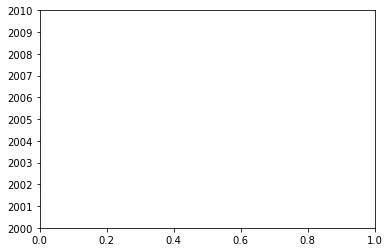

In [11]:
#df_RENAULT["Date d'achat "] = pd.to_datetime(df_RENAULT["Date d'achat "])
#df_RENAULT['year']= df_RENAULT["Date d'achat "].apply(lambda x: x.year)
years = np.linspace(1992, 2019, 28)
for marque in L_marque:
    count=[]
    for year in years:
        a = locals()["df_" + f"{marque}"]["Date d'achat "][locals()["df_" + f"{marque}"]["Date d'achat "].apply(lambda x: x.year) == float(year)]
        #a = df_RENAULT["Date d'achat "][df_RENAULT["Date d'achat "].apply(lambda x: x.year) == float(year)].shape[0]
        count.append(a)

    plt.plot(years, count)
    plt.xlabel("year")
    plt.ylabel("number of trucs sold")
    plt.title("repartition of the sell regarding norme EU 2")

In [32]:
# assemblage des 2 prix en 1
df['prix camion'] = df["Prix d'achat du camion complet (euros HT)"].fillna(0)
df['prix camion'] = df["Prix d'achat du camion complet (euros HT)"].fillna(0) + df["Prix du camion complet utilisé pour déterminer le loyer \n(euros HT)"].fillna(0)

In [33]:
def mois_annee(x):
    return np.datetime64(str(x)[:7])
df['mois-annee'] = df["Date d'achat "].map(mois_annee)

In [34]:
df1 = df[['mois-annee', 'prix camion'], ]

In [36]:
df2 = df1.groupby(['mois-annee']).mean()

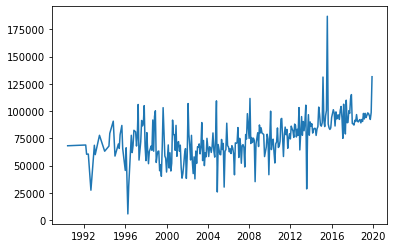

In [38]:
plt.plot(df2)